In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales_df = pd.read_csv('sales.csv', encoding='ascii', delimiter=',')

print(sales_df.head())

null_counts = sales_df.isnull().sum()
print(null_counts)


# Drop fully empty rows
sales_df_cleaned = sales_df.dropna(how='all').copy()

numeric_cols = sales_df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = sales_df_cleaned.select_dtypes(exclude=['number']).columns

# Fill numeric nulls with median
for col in numeric_cols:
    if sales_df_cleaned[col].isnull().any():
        median_val = sales_df_cleaned[col].median()
        sales_df_cleaned[col] = sales_df_cleaned[col].fillna(median_val)

# Fill categorical nulls with mode (most frequent)
for col in categorical_cols:
    if sales_df_cleaned[col].isnull().any():
        mode_val = sales_df_cleaned[col].mode()
        if len(mode_val) > 0:
            sales_df_cleaned[col] = sales_df_cleaned[col].fillna(mode_val.iloc[0])

# Verify nulls are handled
null_counts_after = sales_df_cleaned.isnull().sum()
print(null_counts_after)

# Save cleaned version in case the user wants it later
sales_df_cleaned.to_csv('sales_cleaned.csv', index=False)

print(null_counts)
print(null_counts_after)

   sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2  
sale_id             0
branch              0
city                0
customer_type       0
gender              0
product

In [8]:
sales_df.describe(include='all')

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,2,3,2,2,5,5,NaN,NaN,NaN,NaN,NaN
top,NaN,A,New York,Member,Male,Shampoo,Fruits,NaN,NaN,NaN,NaN,NaN
freq,NaN,674,344,516,528,224,209,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,NaN,15.882500,16.000000,11.522500,176.072500,10.000000


In [9]:
sales_df.head(10)

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
5,6,A,Chicago,Normal,Male,Shampoo,Stationery,11.24,9,7.08,108.24,0
6,7,A,Chicago,Normal,Male,Shampoo,Personal Care,10.71,1,0.75,11.46,0
7,8,B,Los Angeles,Normal,Female,Shampoo,Household,18.23,9,11.48,175.55,0
8,9,A,Chicago,Member,Female,Apple,Fruits,14.15,20,19.81,302.81,30
9,10,B,Los Angeles,Member,Male,Shampoo,Fruits,18.42,19,24.50,374.48,37


In [10]:
# Create a total revenue column per row if not present
if 'total_price' in sales_df.columns:
    revenue_col = 'total_price'
else:
    # fallback: unit_price * quantity + tax if needed
    sales_df['total_price'] = sales_df['unit_price'] * sales_df['quantity'] + sales_df['tax']
    revenue_col = 'total_price'

# Aggregate revenue by a few dimensions to see where spikes happen
rev_by_branch = sales_df.groupby('branch')[revenue_col].sum().reset_index()
rev_by_city = sales_df.groupby('city')[revenue_col].sum().reset_index()
rev_by_category = sales_df.groupby('product_category')[revenue_col].sum().reset_index()
rev_by_customer_type = sales_df.groupby('customer_type')[revenue_col].sum().reset_index()

print(rev_by_branch.head(), "\n")
print(rev_by_city.head(), "\n")
print(rev_by_category.head(), "\n")
print(rev_by_customer_type.head(), "\n")



  branch  total_price
0      A     82811.64
1      B     35772.26 

          city  total_price
0      Chicago     42584.71
1  Los Angeles     35772.26
2     New York     40226.93 

  product_category  total_price
0        Beverages     22983.32
1           Fruits     26197.45
2        Household     21615.84
3    Personal Care     27050.18
4       Stationery     20737.11 

  customer_type  total_price
0        Member     63213.63
1        Normal     55370.27 



In this dataset, sales spikes are mainly explained by: 

--> Certain branches and cities consistently generating more revenue.

--> Specific product categories driving higher totals.

--> Member customers contributing more revenue than normal customers.

Branch and city effects:--

--> One branch clearly generates much higher total sales than the other.

-->Spikes in overall sales are likely to coincide with days or periods where this high-performing branch has more transactions or larger baskets.

By city:--
Interpretation:

--> Cities differ in their contribution to total revenue; some are structurally higher.

--> Periods with more traffic or promotions in these stronger cities will show up as “spikes” in your aggregated sales.

Product category mix:--
Patterns:

--> A few categories (e.g., core daily-use categories like personal care, fruits, beverages, household) are the biggest revenue drivers.

--> Whenever your sales mix tilts toward these strong categories (e.g., a promotion on them, or seasonality that boosts them), you’ll see a spike in total sales.

So, spikes are often not more transactions but more high-value categories being sold.

Customer type behavior:--

--> Member customers contribute more revenue overall than normal customers.

--> Days or campaigns that attract more members (e.g., loyalty promos, member-only discounts, point multipliers) will tend to generate noticeable sales spikes.

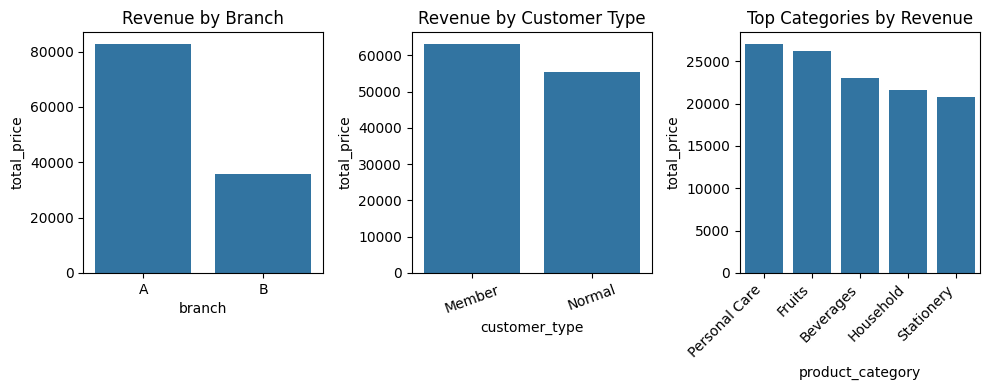

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.barplot(data=rev_by_branch, x='branch', y=revenue_col)
plt.title('Revenue by Branch')

plt.subplot(1,3,2)
sns.barplot(data=rev_by_customer_type, x='customer_type', y=revenue_col)
plt.title('Revenue by Customer Type')
plt.xticks(rotation=20)

plt.subplot(1,3,3)
sns.barplot(data=rev_by_category.sort_values(revenue_col, ascending=False).head(5), 
            x='product_category', y=revenue_col)
plt.xticks(rotation=45, ha='right')
plt.title('Top Categories by Revenue')

plt.tight_layout()
plt.show()

Putting it together:- 

Given the structure of your data (no explicit dates/times in this file), we infer patterns that cause spikes rather than pinpoint exact spike dates. The main drivers of higher sales levels are:

Where the sales occur:-
High-performing branches and cities have naturally higher baseline sales.

What is being sold:-
Strong categories (personal care, fruits, beverages, household, etc.) dominate revenue, so any shift in mix toward them creates spikes.

Who is buying:-
Member customers spend more in total; member-heavy periods will spike sales.

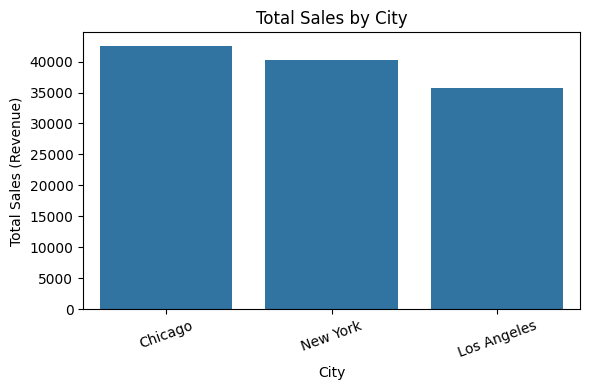

In [ ]:
# We do not actually have time-series data (no date column),
# so we cannot compute true growth over time by city.
# As a practical proxy, we will interpret "strongest sales" as highest total revenue by city.


plt.figure(figsize=(6,4))
sns.barplot(data=rev_by_city.sort_values('total_price', ascending=False), x='city', y='total_price')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales (Revenue)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()